#PURPOSE
This notebook will implement a churn predictor, the notebook is more or less based on https://www.youtube.com/watch?v=MSBY28IJ47U&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=20&ab_channel=codebasics. 

Please the check out the video

#IMPORT DATA

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#PREPROCESSING DATA

In [5]:
df = pd.read_csv("./churn-prediction.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.shape

(7043, 21)

In [8]:
def print_unique_values(df):
  for col in df:
    print(col, " :", df[col].unique())

In [9]:
print_unique_values(df)

customerID  : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender  : ['Female' 'Male']
SeniorCitizen  : [0 1]
Partner  : ['Yes' 'No']
Dependents  : ['No' 'Yes']
tenure  : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService  : ['No' 'Yes']
MultipleLines  : ['No phone service' 'No' 'Yes']
InternetService  : ['DSL' 'Fiber optic' 'No']
OnlineSecurity  : ['No' 'Yes' 'No internet service']
OnlineBackup  : ['Yes' 'No' 'No internet service']
DeviceProtection  : ['No' 'Yes' 'No internet service']
TechSupport  : ['No' 'Yes' 'No internet service']
StreamingTV  : ['No' 'Yes' 'No internet service']
StreamingMovies  : ['No' 'Yes' 'No internet service']
Contract  : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  : ['Yes' 'No']
PaymentMethod  : ['Electronic check' 'Mail

In [10]:
# convert TotalCharges  to numeric
pd.to_numeric(df['TotalCharges'])

ValueError: ignored

In [11]:
# cant convert TotalCharges  to numeric because " " present
# coerce
pd.to_numeric(df['TotalCharges'], errors="coerce").isnull()
df[pd.to_numeric(df['TotalCharges'], errors="coerce").isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
df1 = df[df['TotalCharges']!=" "]
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [13]:
print_unique_values(df1)

customerID  : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender  : ['Female' 'Male']
SeniorCitizen  : [0 1]
Partner  : ['Yes' 'No']
Dependents  : ['No' 'Yes']
tenure  : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService  : ['No' 'Yes']
MultipleLines  : ['No phone service' 'No' 'Yes']
InternetService  : ['DSL' 'Fiber optic' 'No']
OnlineSecurity  : ['No' 'Yes' 'No internet service']
OnlineBackup  : ['Yes' 'No' 'No internet service']
DeviceProtection  : ['No' 'Yes' 'No internet service']
TechSupport  : ['No' 'Yes' 'No internet service']
StreamingTV  : ['No' 'Yes' 'No internet service']
StreamingMovies  : ['No' 'Yes' 'No internet service']
Contract  : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  : ['Yes' 'No']
PaymentMethod  : ['Electronic check' 'Mailed c

In [14]:
# drop customer id 
df1.drop(['customerID'], axis='columns', inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
df1['gender'].replace({"Female":1, "Male":0}, inplace=True)
df1

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,0,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,1,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,1,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,1,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,0,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [16]:
print_unique_values(df1)

gender  : [1 0]
SeniorCitizen  : [0 1]
Partner  : ['Yes' 'No']
Dependents  : ['No' 'Yes']
tenure  : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService  : ['No' 'Yes']
MultipleLines  : ['No phone service' 'No' 'Yes']
InternetService  : ['DSL' 'Fiber optic' 'No']
OnlineSecurity  : ['No' 'Yes' 'No internet service']
OnlineBackup  : ['Yes' 'No' 'No internet service']
DeviceProtection  : ['No' 'Yes' 'No internet service']
TechSupport  : ['No' 'Yes' 'No internet service']
StreamingTV  : ['No' 'Yes' 'No internet service']
StreamingMovies  : ['No' 'Yes' 'No internet service']
Contract  : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  : ['Yes' 'No']
PaymentMethod  : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges  : [29.85 56.95 53.85 ... 63.1  44

In [17]:
# replace all 'No internet service' with No
# replace all 'No phone service' with No
df1.replace({'No internet service':'No'}, inplace=True)
df1.replace({'No phone service':'No'}, inplace=True)
print_unique_values(df1)

gender  : [1 0]
SeniorCitizen  : [0 1]
Partner  : ['Yes' 'No']
Dependents  : ['No' 'Yes']
tenure  : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService  : ['No' 'Yes']
MultipleLines  : ['No' 'Yes']
InternetService  : ['DSL' 'Fiber optic' 'No']
OnlineSecurity  : ['No' 'Yes']
OnlineBackup  : ['Yes' 'No']
DeviceProtection  : ['No' 'Yes']
TechSupport  : ['No' 'Yes']
StreamingTV  : ['No' 'Yes']
StreamingMovies  : ['No' 'Yes']
Contract  : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  : ['Yes' 'No']
PaymentMethod  : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges  : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges  : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn  : ['No' 'Yes']


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [18]:
# replace no with 0
# replace 1 with 1
df1.replace({'No':0, 'Yes':1}, inplace=True)

In [19]:
print_unique_values(df1)

gender  : [1 0]
SeniorCitizen  : [0 1]
Partner  : [1 0]
Dependents  : [0 1]
tenure  : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService  : [0 1]
MultipleLines  : [0 1]
InternetService  : ['DSL' 'Fiber optic' 0]
OnlineSecurity  : [0 1]
OnlineBackup  : [1 0]
DeviceProtection  : [0 1]
TechSupport  : [0 1]
StreamingTV  : [0 1]
StreamingMovies  : [0 1]
Contract  : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  : [1 0]
PaymentMethod  : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges  : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges  : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn  : [0 1]


In [20]:
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6977,0,0,0,0,24,1,0,DSL,0,1,0,0,0,0,Month-to-month,1,Mailed check,49.70,1218.25,0
3442,0,0,0,0,29,1,0,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Credit card (automatic),98.80,2807.1,0
6244,0,1,1,0,54,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Credit card (automatic),99.05,5295.7,0
770,0,0,0,0,11,1,0,0,0,0,0,0,0,0,Month-to-month,1,Credit card (automatic),20.45,237.3,0
4444,1,0,0,0,3,1,0,0,0,0,0,0,0,0,Month-to-month,0,Mailed check,19.85,63.75,1


In [21]:
# using label encoder to convert the categorical columns: PaymentMethod, Contract, InternetService  

# import 
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()
le.fit(df1['PaymentMethod'])
df1['PaymentMethod'] = le.transform(df1['PaymentMethod'])

<ipython-input-22-9ec906e6d589>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['PaymentMethod'] = le.transform(df1['PaymentMethod'])


In [23]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,2,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,3,56.95,1889.5,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,3,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,0,42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,2,70.70,151.65,1


In [24]:
le.fit(df1['Contract'])
df1['Contract'] = le.transform(df1['Contract'])

<ipython-input-24-8437e2baa37d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Contract'] = le.transform(df1['Contract'])


In [25]:
# replace 0 in InterneService with No Internet Service
df1['InternetService'].replace({0:'No Internet Service'}, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [26]:
le.fit(df1['InternetService'])
df1['InternetService'] = le.transform(df1['InternetService'])

<ipython-input-26-e84769d2df24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['InternetService'] = le.transform(df1['InternetService'])


In [31]:
print_unique_values(df1)

gender  : [1 0]
SeniorCitizen  : [0 1]
Partner  : [1 0]
Dependents  : [0 1]
tenure  : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService  : [0 1]
MultipleLines  : [0 1]
InternetService  : [0 1 2]
OnlineSecurity  : [0 1]
OnlineBackup  : [1 0]
DeviceProtection  : [0 1]
TechSupport  : [0 1]
StreamingTV  : [0 1]
StreamingMovies  : [0 1]
Contract  : [0 1 2]
PaperlessBilling  : [1 0]
PaymentMethod  : [2 3 0 1]
MonthlyCharges  : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges  : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn  : [0 1]


In [37]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'])

<ipython-input-37-cffe5c08e1e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'])


In [40]:
df1.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [41]:
df1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.495307,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.872582,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.688567,0.592719,1.573237,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.737271,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.832934,0.491363,1.067504,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [42]:
# scale total charges, monthly charges, tenure
from sklearn.preprocessing import StandardScaler

s = StandardScaler()

In [43]:
df2 = df1.copy()

In [45]:
df2.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.495307,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.872582,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.688567,0.592719,1.573237,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.737271,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.832934,0.491363,1.067504,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [49]:
df2[['tenure', 'MonthlyCharges', 'TotalCharges']] = s.fit_transform(df2[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [52]:
df2.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7.032000e+03,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7.032000e+03,7.032000e+03,7032.000000
mean,0.495307,0.162400,0.482509,0.298493,-1.126643e-16,0.903299,0.421928,0.872582,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.688567,0.592719,1.573237,6.062651e-17,-1.119064e-16,0.265785
std,0.500014,0.368844,0.499729,0.457629,1.000071e+00,0.295571,0.493902,0.737271,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.832934,0.491363,1.067504,1.000071e+00,1.000071e+00,0.441782
min,0.000000,0.000000,0.000000,0.000000,-1.280248e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.547283e+00,-9.990692e-01,0.000000
25%,0.000000,0.000000,0.000000,0.000000,-9.542963e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-9.709769e-01,-8.302488e-01,0.000000
50%,0.000000,0.000000,0.000000,0.000000,-1.394171e-01,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.845440e-01,-3.908151e-01,0.000000
75%,1.000000,0.000000,1.000000,1.000000,9.199259e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,8.331482e-01,6.668271e-01,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.612573e+00,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.793381e+00,2.824261e+00,1.000000


#UNEQUAL TRAINING SAMPLES, DOWNSIZE DOMINANT CLASS 

In [218]:
churn_0 = df2[df2.Churn==0]
churn_1 = df2[df2.Churn==1]
len(churn_0)

5163

In [219]:
len(churn_1)

1869

In [220]:
churn_0_sampled = churn_0.sample(n=1869,replace=True)
len(churn_0_sampled)

1869

In [221]:
df3 = pd.concat([churn_0_sampled, churn_1], axis=0)
df3.shape

(3738, 20)

In [223]:
df3.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2753,1,0,0,0,-1.280248,1,1,1,0,0,0,0,1,1,0,0,3,1.025527,-0.965164,1
6664,1,0,0,0,0.145791,1,1,1,0,1,1,0,1,1,1,1,0,1.329677,0.707289,0
3991,1,0,0,0,-1.158016,1,1,1,0,1,0,1,0,1,0,1,2,0.954060,-0.847565,1
2029,0,0,1,0,1.408853,1,0,1,1,1,0,0,0,1,1,1,1,0.857663,1.664534,1
6055,1,0,0,0,-1.076528,1,0,0,0,0,0,0,0,1,0,1,2,-0.325697,-0.857183,0


#SPLIT INTO TRAIN TEST SPLIT

In [53]:
from sklearn.model_selection import train_test_split

In [224]:
x = df3.drop(['Churn'], axis='columns')
y = df3.Churn

In [225]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2687,0,0,0,0,-0.180161,1,0,1,0,0,1,1,0,1,0,0,2,0.870959,0.151261
4235,1,1,1,0,0.960670,1,1,1,1,1,1,1,0,0,1,0,2,1.025527,1.406704
4285,0,0,1,1,0.512486,1,1,0,1,1,0,1,1,0,2,0,1,0.300886,0.479879
4747,0,0,0,0,0.105047,1,0,2,0,0,0,0,0,0,1,0,0,-1.469168,-0.674708
6818,1,0,0,0,-1.198760,1,0,0,1,1,0,1,0,1,2,0,3,0.209474,-0.913236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,0,0,0,0,-0.832064,1,0,0,0,0,0,1,1,0,1,1,2,-0.166143,-0.686267
7026,1,0,0,0,-0.954296,1,0,0,0,0,0,0,0,0,0,1,0,-0.684694,-0.829411
7032,0,1,0,0,-1.280248,1,1,1,0,0,0,0,0,0,0,1,2,0.364042,-0.973944
7034,1,0,0,0,1.408853,1,1,1,1,1,1,0,1,0,0,1,1,1.268182,2.030764


In [226]:
y

2687    0
4235    0
4285    0
4747    0
6818    0
       ..
7021    1
7026    1
7032    1
7034    1
7041    1
Name: Churn, Length: 3738, dtype: int64

In [227]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=5)

In [228]:
xtrain.shape

(2616, 19)

#MODEL

In [229]:
len(x.columns)

19

In [230]:
import tensorflow.keras as keras

In [231]:
# model1
# model = keras.models.Sequential([
#     keras.layers.Dense(2, input_shape=(19,), activation='sigmoid')
# ])


# model 2
# model = keras.models.Sequential([
#     keras.layers.Dense(10, input_shape=(19,), activation='relu'),
#     keras.layers.Dense(1, activation='sigmoid')
# ])

# model3
model = keras.models.Sequential([
    keras.layers.Dense(10, input_shape=(19,), activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [232]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 10)                200       
                                                                 
 dense_33 (Dense)            (None, 32)                352       
                                                                 
 dense_34 (Dense)            (None, 64)                2112      
                                                                 
 dense_35 (Dense)            (None, 128)               8320      
                                                                 
 dense_36 (Dense)            (None, 1)                 129       
                                                                 
Total params: 11,113
Trainable params: 11,113
Non-trainable params: 0
_________________________________________________________________


In [233]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#TRAIN

In [234]:
hist = model.fit(xtrain, ytrain, epochs=50)

Epoch 1/50
82/82 [==============================] - 1s 2ms/step - loss: 0.5798 - accuracy: 0.6999
Epoch 2/50
82/82 [==============================] - 0s 3ms/step - loss: 0.5067 - accuracy: 0.7611
Epoch 3/50
82/82 [==============================] - 0s 3ms/step - loss: 0.4883 - accuracy: 0.7737
Epoch 4/50
82/82 [==============================] - 0s 3ms/step - loss: 0.4800 - accuracy: 0.7752
Epoch 5/50
82/82 [==============================] - 0s 3ms/step - loss: 0.4752 - accuracy: 0.7756
Epoch 6/50
82/82 [==============================] - 0s 3ms/step - loss: 0.4677 - accuracy: 0.7783
Epoch 7/50
82/82 [==============================] - 0s 3ms/step - loss: 0.4654 - accuracy: 0.7821
Epoch 8/50
82/82 [==============================] - 0s 3ms/step - loss: 0.4629 - accuracy: 0.7791
Epoch 9/50
82/82 [==============================] - 0s 3ms/step - loss: 0.4582 - accuracy: 0.7852
Epoch 10/50
82/82 [==============================] - 0s 3ms/step - loss: 0.4545 - accuracy: 0.7813
Epoch 11/50
82/82 [

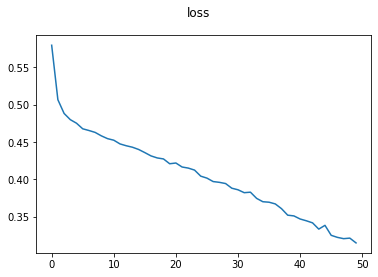

In [235]:
# plot losses
fig = plt.figure()
plt.plot(hist.history['loss'])
plt.suptitle('loss')
plt.show()

In [236]:
model.evaluate(xtest, ytest)

36/36 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.7228


[0.6890917420387268, 0.7228164076805115]

In [237]:
from sklearn.metrics import confusion_matrix

ps = model.predict(xtest)
ps = [[round(i[0])] for i in ps]
cm = confusion_matrix(ytest, ps)

36/36 [==============================] - 0s 1ms/step


Text(69.0, 0.5, 'Truth')

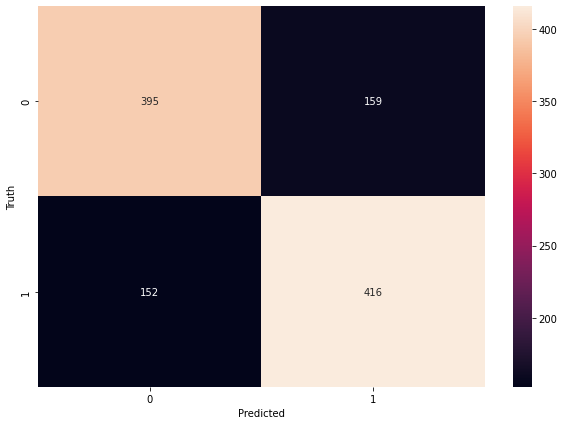

In [238]:
import seaborn as sn

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [246]:
395/(395+159)

0.7129963898916968

In [242]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ps))

              precision    recall  f1-score   support

           0       0.72      0.71      0.72       554
           1       0.72      0.73      0.73       568

    accuracy                           0.72      1122
   macro avg       0.72      0.72      0.72      1122
weighted avg       0.72      0.72      0.72      1122



In [241]:
classification_report??